In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from functools import reduce
import scipy
from copy import deepcopy
from scipy.linalg import logm
import numpy as np
import dill


In [3]:

# files = """code/controls_9/control_10
#  code/controls_9/control_11  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_110 | Bin 1863 -> 1863 bytes
#  code/controls_9/control_12  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_135 | Bin 1863 -> 1863 bytes
#  code/controls_9/control_14  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_15  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_150 | Bin 1863 -> 1863 bytes
#  code/controls_9/control_16  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_17  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_18  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_19  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_21  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_22  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_23  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_24  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_25  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_29  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_3   | Bin 1863 -> 1863 bytes
#  code/controls_9/control_30  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_31  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_33  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_34  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_38  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_4   | Bin 1863 -> 1863 bytes
#  code/controls_9/control_43  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_44  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_5   | Bin 1863 -> 1863 bytes
#  code/controls_9/control_52  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_55  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_56  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_57  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_58  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_63  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_64  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_69  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_7   | Bin 1863 -> 1863 bytes
#  code/controls_9/control_70  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_73  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_78  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_8   | Bin 1863 -> 1863 bytes
#  code/controls_9/control_9   | Bin 1863 -> 1863 bytes
#  code/controls_9/control_95  | Bin 1863 -> 1863 bytes
#  code/controls_9/control_98  | Bin 1863 -> 1863 bytes"""


In [4]:
# controls = [f.split('/')[-1] for f in [f for f in files.split() if '/' in f]]

In [7]:
import os
from os.path import isfile, join
mypath = 'controls_96'
import os
#onlyfiles = [f for f in os.listdir(mypath) if isfile(join(mypath, f)) and f[-2:] == '_4']
onlyfiles = [os.path.join(mypath, control) for control in os.listdir(mypath)]

In [8]:
# import os
# from os.path import isfile, join
# mypath = 'controls_69'
# controls = [os.]
# #onlyfiles = [f for f in os.listdir(mypath) if isfile(join(mypath, f)) and f[-2:] == '_4']
# onlyfiles = [os.path.join(mypath, control) for control in controls]

In [9]:
# controls = [dill.load(open(file, 'rb')) for file in [os.path.join(mypath, file) for file in onlyfiles]]
controlset = [dill.load(open(file, 'rb')) for file in onlyfiles]

In [10]:
import dill 
filename = 'pickled_controls9.pkl'
pca = dill.load(open(filename, 'rb'))

In [11]:
max([np.max(c) for c in controlset])

8.01120533680654

In [12]:
pca.num_controls = len(controlset)
pca.controlset = controlset

In [13]:
iswap = np.array([[1, 0, 0, 0], [0, 0, -1.j, 0], [0, -1.j, 0, 0], [0, 0, 0, 1]])

In [14]:
# pca.num_steps = pca.controlset[0].shape[0]

In [15]:
def hist_and_support(weights, num=10):
    plt.hist(weights)
    np.argmax(weights)
    top_idx = np.argsort(np.array(weights).T)[0][-num:]
    top_values = [weights[i] for i in top_idx]
    print(f"SUPPORT:{np.sum(top_values)}")
    print(f"NUM CONTROLS: {num}")
    return top_idx

In [16]:
# entangle_ZZ = np.array([[1, 0, 0, 0], [0, 1.j, 0, 0], [0, 0, 1.j, 0], [0, 0, 0, 1]])

In [17]:
# from GRAPE import control_unitaries
# a = reduce(np.dot, control_unitaries([], [np.array([[0, 1], [1, 0]])], np.array([[[1]]]), np.pi/2 + .1))

In [18]:
# b = reduce(np.dot, control_unitaries([], [np.array([[0, 1], [1, 0]])], np.array([[[-1]]]), np.pi/2 + .1))

In [19]:
# new_control = np.zeros(pca.controlset[0].shape)

In [20]:
# new_control[:, -1] = -3*np.pi/4 * 1/(pca.controlset[0].shape[0]*pca.dt)

In [21]:
# other_new_control = np.zeros(pca.controlset[0].shape)
# other_new_control[:, -1] = np.pi/4 * 1/(pca.controlset[0].shape[0]*pca.dt)

In [22]:
# other_new_control = np.zeros(pca.controlset[0].shape)
# num_steps = pca.controlset[0].shape[0]
# other_new_control[:int(num_steps/3), -1] = 3/2 * np.pi/4 * 1/(pca.controlset[0].shape[0]*pca.dt)
# other_new_control[int(num_steps/3 + 1),0] = 1/pca.dt * np.pi/2 
# other_new_control[int(num_steps/3 + 1),2] = 1/pca.dt * np.pi/2
# other_new_control[-int(num_steps/3+1),0] = 1/pca.dt * np.pi/2
# other_new_control[-int(num_steps/3+1),2] = 1/pca.dt * np.pi/2
# other_new_control[-int(num_steps/3):, -1] = 3/2 * np.pi/4 * 1/(pca.controlset[0].shape[0]*pca.dt)

In [23]:
# other_other_new_control = np.zeros(pca.controlset[0].shape)
# num_steps = pca.controlset[0].shape[0]
# other_other_new_control[0,0] = 1/pca.dt * np.pi/2 
# other_other_new_control[:, -1] = -3*np.pi/4 * 1/((pca.controlset[0].shape[0]-2)*pca.dt)
# other_other_new_control[-1,0] = 1/pca.dt * np.pi/2 

In [24]:
# last_control = np.zeros(pca.controlset[0].shape)
# num_steps = pca.controlset[0].shape[0]
# last_control[0,2] = 1/pca.dt * np.pi/2 
# last_control[:, -1] = -3*np.pi/4 * 1/((pca.controlset[0].shape[0]-2)*pca.dt)
# last_control[-1,2] = 1/pca.dt * np.pi/2 

In [25]:
# a.dot(b)

In [26]:
# len(pca.control_hamiltonians)

In [27]:
# foo = np.zeros((40, 5))

In [28]:
#from functools import reduce
#from GRAPE import control_unitaries
#a = np.conj(entangle_ZZ.T).dot(reduce(np.dot, reversed(control_unitaries([], pca.control_hamiltonians, new_control, pca.dt))))
# b = np.conj(entangle_ZZ.T).dot(reduce(np.dot, reversed(control_unitaries([], pca.control_hamiltonians, -foo, pca.dt))))

# Plotting Utils

In [29]:
%matplotlib inline 
def oned_off_diagonals(pca, scale):
    import itertools
    from itertools import product
    import multiprocessing
    from pauli_channel_approximation import compute_dpn_and_fid
    import matplotlib.pyplot as plt
    %matplotlib inline 


    def generate_indices(num_points, order_desired):
        num_indices = len(order_desired)
        tuples = product(range(num_points), repeat=num_indices)
        indices = [sum([num_points**(num_indices - 1 - order_desired[i]) * t[i] for i in range(num_indices)]) for t in tuples]
        return indices

    values_to_plot = []
    corr = []
    for i, detuning in enumerate(pca.detunings):
        # This sets the x axis (It's okay to pick detuning[0] because they were all set to the same detuning.)
        values = np.linspace(-detuning[0]/scale, detuning[0]/scale, num_points)
        values_to_plot.append(values)
        corr.append(i)
    # This was when I was evaluating more detuning combinations before, now this is just indexing over each detuning param.
    combinations = [[v] + [0] * len(pca.detunings) for v in values]
    #combinations = list(zip(values, [0 for _ in values]))
    # Multiprocessing for faster evaluation.
    pool = multiprocessing.Pool(num_processors)
    lst = [(pca.controlset, pca.ambient_hamiltonian, combo, pca.dt,
            pca.control_hamiltonians, pca.target_operator, pca.probs)
           for combo in combinations]
    projs_fidelities = pool.map(compute_dpn_and_fid, lst)
    pool.close()
    # Compute the off diagonals and fidelities.
    projs = [pf[0] for pf in projs_fidelities]
    fidelities = [pf[1] for pf in projs_fidelities]
    projs = np.vstack(projs).T
    fidelities = np.vstack(fidelities).T
    plt.figure(figsize=(16, 8))  # the first figure
    plt.subplot(211)  # the first subplot in the first figure
    
    for i, row in enumerate(projs[:-1, :]):
        plt.plot(range(len(row)), row)
    plt.plot(range(len(projs[-1, :])), projs[-1, :], label="min", color='k', linewidth=2, zorder=10)
    plt.legend()
    plt.ylabel("Absolute Sum of Off Diagonal Elements")
    plt.semilogy()
    plt.axvline((num_points-1)/2)
    plt.subplot(212)  # the second subplot in the first figure
    
    for i, row in enumerate(fidelities[:-1, :]):
        plt.plot(range(len(row)), -np.log(1 - row))
    plt.plot(range(len(fidelities[-1, :])), -np.log(1 - fidelities[-1, :]), label="min", color='k', linewidth=2, zorder=10)
    plt.legend()
    plt.ylabel("f")
    samples = np.linspace(plt.ylim()[0], plt.ylim()[1], 11)
    labels = -(np.exp(-samples) - 1)
    plt.xlabel("Sample Index")
    plt.tight_layout()
    plt.yticks(samples, labels)
    plt.tight_layout()
    plt.show()
    
    


def off_diagonals(pca, scale):
    import itertools
    from itertools import product
    import multiprocessing
    from pauli_channel_approximation import compute_dpn_and_fid
    import matplotlib.pyplot as plt

    def generate_indices(num_points, order_desired):
        num_indices = len(order_desired)
        tuples = product(range(num_points), repeat=num_indices)
        indices = [sum([num_points**(num_indices - 1 - order_desired[i]) * t[i] for i in range(num_indices)]) for t in tuples]
        return indices

    values_to_plot = []
    corr = []
    for i, detuning in enumerate(pca.detunings):
        # This sets the x axis (It's okay to pick detuning[0] because they were all set to the same detuning.)
        values = np.linspace(-detuning[0]/scale, detuning[0]/scale, num_points)
        values_to_plot.append(values)
        corr.append(i)
    # This was when I was evaluating more detuning combinations before, now this is just indexing over each detuning param.
    combinations = itertools.product(*values_to_plot)
    new_combinations = []
    for combo in combinations:
        new_combo = []
        for index in corr:
            new_combo.append(combo[index])
        new_combinations.append(new_combo)
    combinations = new_combinations

    tuple_length = len(combinations[0])
    standard_ordering = list(range(tuple_length))
    ordering = standard_ordering
    indices = generate_indices(len(values), ordering)

    # Multiprocessing for faster evaluation.
    pool = multiprocessing.Pool(num_processors)
    lst = [(pca.controlset, pca.ambient_hamiltonian, combo, pca.dt,
            pca.control_hamiltonians, pca.target_operator, pca.probs)
           for combo in combinations]
    projs_fidelities = pool.map(compute_dpn_and_fid, lst)
    pool.close()

    # Compute the off diagonals and fidelities.
    projs = [pf[0] for pf in projs_fidelities]
    fidelities = [pf[1] for pf in projs_fidelities]
    projs = np.vstack(projs).T
    fidelities = np.vstack(fidelities).T
    plt.figure(figsize=(16, 8))  # the first figure
    plt.subplot(211)  # the first subplot in the first figure

    for i, row in enumerate(projs[:-1, :]):
        reordered_row = np.array([row[j] for j in indices])
        plt.plot(range(len(row)), reordered_row)
    plt.plot(range(len(projs[-1, :])), [projs[-1, :][i] for i in indices], label="min", color='k', linewidth=2, zorder=10)
    plt.legend()
    plt.ylabel("Absolute Sum of Off Diagonal Elements")
    plt.semilogy()
    plt.subplot(212)  # the second subplot in the first figure
    for i, row in enumerate(fidelities[:-1, :]):
        reordered_row = np.array([row[j] for j in indices])
        plt.plot(range(len(row)), -np.log(1 - reordered_row))
    plt.plot(range(len(fidelities[-1, :])), [-np.log(1 - fidelities[-1, :][i]) for i in indices], label="min", color='k', linewidth=2, zorder=10)
    plt.legend()
    plt.ylabel("f")
    samples = np.linspace(plt.ylim()[0], plt.ylim()[1], 11)
    labels = -(np.exp(-samples) - 1)
    plt.xlabel("Sample Index")
    plt.tight_layout()
    plt.yticks(samples, labels)
    plt.tight_layout()
    plt.show()
    
def off_diagonals2(pca1, pca2, scale):
    for l, pca in enumerate([pca1, pca2]):
        import itertools
        from itertools import product
        import multiprocessing
        from pauli_channel_approximation import compute_dpn_and_fid
        import matplotlib.pyplot as plt
        
        def generate_indices(num_points, order_desired):
            num_indices = len(order_desired)
            tuples = product(range(num_points), repeat=num_indices)
            indices = [sum([num_points**(num_indices - 1 - order_desired[i]) * t[i] for i in range(num_indices)]) for t in tuples]
            return indices

        values_to_plot = []
        corr = []
        for i, detuning in enumerate(pca.detunings):
            # This sets the x axis (It's okay to pick detuning[0] because they were all set to the same detuning.)
            values = np.linspace(-detuning[0]/scale, detuning[0]/scale, num_points)
            values_to_plot.append(values)
            corr.append(i)
        # This was when I was evaluating more detuning combinations before, now this is just indexing over each detuning param.
        combinations = itertools.product(*values_to_plot)
        new_combinations = []
        for combo in combinations:
            new_combo = []
            for index in corr:
                new_combo.append(combo[index])
            new_combinations.append(new_combo)
        combinations = new_combinations

        tuple_length = len(combinations[0])
        standard_ordering = list(range(tuple_length))
        ordering = standard_ordering
        indices = generate_indices(len(values), ordering)

        # Multiprocessing for faster evaluation.
        pool = multiprocessing.Pool(num_processors)
        lst = [(pca.controlset, pca.ambient_hamiltonian, combo, pca.dt,
                pca.control_hamiltonians, pca.target_operator, pca.probs)
               for combo in combinations]
        projs_fidelities = pool.map(compute_dpn_and_fid, lst)
        pool.close()

        # Compute the off diagonals and fidelities.
        projs = [pf[0] for pf in projs_fidelities]
        fidelities = [pf[1] for pf in projs_fidelities]
        projs = np.vstack(projs).T
        fidelities = np.vstack(fidelities).T
        # If you just uncomment the first two rows it fails for some reason...
#         for i, row in enumerate(projs[:-1, :]):
#             reordered_row = np.array([row[j] for j in indices])
#             plt.plot(range(len(row)), reordered_row)
        plt.plot(range(len(projs[-1, :])), [projs[-1, :][i] for i in indices], c=['r','b'][l], linewidth=2, zorder=10, label=['1st order', '0th order'][l])
    plt.legend()
    plt.ylabel("Absolute Sum of Off Diagonal Elements")
    plt.semilogy()

def oned_off_diagonals2(pca1, pca2, scale, index=0):
    for l, pca in enumerate([pca1, pca2]):
        import itertools
        from itertools import product
        import multiprocessing
        from pauli_channel_approximation import compute_dpn_and_fid
        import matplotlib.pyplot as plt


        def generate_indices(num_points, order_desired):
            num_indices = len(order_desired)
            tuples = product(range(num_points), repeat=num_indices)
            indices = [sum([num_points**(num_indices - 1 - order_desired[i]) * t[i] for i in range(num_indices)]) for t in tuples]
            return indices

        values_to_plot = []
        corr = []
        for i, detuning in enumerate(pca.detunings):
            # This sets the x axis (It's okay to pick detuning[0] because they were all set to the same detuning.)
            values = np.linspace(-detuning[0]/scale, detuning[0]/scale, num_points)
            values_to_plot.append(values)
            corr.append(i)
        # This was when I was evaluating more detuning combinations before, now this is just indexing over each detuning param.
        combinations = [[0] * len(pca.detunings) for _ in values]
        for i, v in enumerate(values):
            combinations[i][index] = v
        new_combinations = []
        for combination in combinations:
            new_c = []
            for i, c in enumerate(combination):
                for _ in range(pca.detunings[i][1]):
                    new_c.append(c)
            new_combinations.append(new_c)
        combinations = new_combinations
        #combinations = list(zip(values, [0 for _ in values]))
        # Multiprocessing for faster evaluation.
#         tuple_length = len(combinations[0])
#         standard_ordering = list(range(tuple_length))
#         ordering = standard_ordering
#         indices = generate_indices(len(values), ordering)

        # Multiprocessing for faster evaluation.
        pool = multiprocessing.Pool(num_processors)
        lst = [(pca.controlset, pca.ambient_hamiltonian, combo, pca.dt,
                pca.control_hamiltonians, pca.target_operator, pca.probs)
               for combo in combinations]
        projs_fidelities = pool.map(compute_dpn_and_fid, lst)
        pool.close()

        # Compute the off diagonals and fidelities.
        projs = [pf[0] for pf in projs_fidelities]
        fidelities = [pf[1] for pf in projs_fidelities]
        projs = np.vstack(projs).T
        fidelities = np.vstack(fidelities).T
        # If you just uncomment the first two rows it fails for some reason...
#         for i, row in enumerate(projs[:-1, :]):
#             reordered_row = np.array([row[j] for j in indices])
#             plt.plot(range(len(row)), reordered_row)
        plt.plot(range(len(projs[-1, :])), projs[-1, :], c=['r','b'][l], linewidth=2, zorder=10, label=['1st order', '0th order'][l])
        plt.axvline((num_points-1)/2)
    plt.legend()
    plt.ylabel("Absolute Sum of Off Diagonal Elements")
    plt.semilogy()

In [30]:
num_weights = 25
scale = 1
num_points = 7
num_processors = 4

In [31]:
# # num_keep = 500
# # pca.controlset = pca.controlset[:num_keep]
# pca.controlset += [new_control, other_new_control, other_other_new_control, last_control]
# #pca.controlset += [new_control, other_new_control]
# pca.num_controls = len(pca.controlset)

In [32]:
np.round_(derivs[-1][1], 2)

NameError: name 'derivs' is not defined

In [33]:
np.round_(derivs[-1][0], 2)

NameError: name 'derivs' is not defined

In [34]:
len(pca.control_hamiltonians)

5

In [35]:
I = np.eye(2)
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1.j], [1.j, 0]])
Z = np.array([[1, 0], [0, -1]])
IZ = np.kron(I, Z)
ZI = np.kron(Z, I)
XI = np.kron(X, I)
IX = np.kron(I, X)
IY = np.kron(I, Y)
YI = np.kron(Y, I)
ZZ = np.kron(Z, Z)
XX = np.kron(X, X)
YY = np.kron(Y, Y)
entangle_ZZ = np.array([[1, 0, 0, 0], [0, 1.j, 0, 0], [0, 0, 1.j, 0], [0, 0, 0, 1]])
iswap = np.array([[1, 0, 0, 0], [0, 0, -1.j, 0], [0, -1.j, 0, 0], [0, 0, 0, 1]])
ambient_hamiltonian = [IZ, ZI, (XX + YY)/10.]
control_hamiltonians = [IX, IY, XI, YI]
pca.ambient_hamiltonian = ambient_hamiltonian
pca.control_hamiltonians = control_hamiltonians

In [36]:
pca.target_operator = iswap

In [37]:
from convex import all_derivs
derivs = all_derivs(pca.controlset, pca.target_operator, pca.control_hamiltonians, pca.ambient_hamiltonian, pca.dt, 1)

/home/anthony/repos/decorrelating_errors/code/convex.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  ambient_hamiltonian = [deepcopy(ah).astype("float") for ah in ambient_hamiltonian0]


In [38]:
from convex import optimal_weights, optimal_weights_1st_order
from pauli_channel_approximation import PCA
PCA.assign_weights(pca, l1=0, l2=0)

/home/anthony/repos/decorrelating_errors/code/pauli_channel_approximation.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/anthony/.pyenv/versions/3.6.3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/anthony/.pyenv/versions/3.6.3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/anthony/.pyenv/versions/3.6.3/envs/personal/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/anthony/.pyenv/versions/3.6.3/envs/personal/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/anthon

Starting optimal weights no constraints 1st order
Starting optimal weights no constraints
Tried assigning weights.


In [39]:
np.matrix([d.flatten() for d in derivs[1]]).T.dot(pca.weights)

matrix([[-3.41650178e-03-1.55259737e-13j],
        [ 1.13690338e-02+1.09471848e-03j],
        [-8.72572488e-03-1.56394016e-02j],
        [ 4.62418170e-03-1.50743143e-03j],
        [ 1.13690338e-02-1.09471846e-03j],
        [-4.79817058e-03-3.76366274e-12j],
        [-5.94533390e-03-1.26312591e-02j],
        [ 5.26031739e-03+4.25773397e-03j],
        [-8.72572490e-03+1.56394016e-02j],
        [-5.94533394e-03+1.26312591e-02j],
        [-4.46737097e-03+1.46831282e-12j],
        [-4.51814808e-04+5.66668489e-04j],
        [ 4.62418170e-03+1.50743145e-03j],
        [ 5.26031739e-03-4.25773396e-03j],
        [-4.51814773e-04-5.66668478e-04j],
        [ 1.26820433e-02+2.45060966e-12j],
        [ 1.84368015e-02-1.94585231e-11j],
        [ 2.18149478e-03-1.25098467e-02j],
        [ 1.38867846e-02+3.52804082e-03j],
        [ 7.39409584e-03-3.26894841e-04j],
        [ 2.18149481e-03+1.25098468e-02j],
        [-7.21579387e-03+4.40252512e-12j],
        [-5.98488856e-03-1.61578547e-02j],
        [ 1

In [40]:
# np.matrix([d.flatten() for d in derivs[1]]).T.dot(pca.weights)

In [51]:
[np.round_(d[3][0],2) for d in derivs[1]]

[(-1.01+0j),
 (-1.03+0j),
 (-1.05-0j),
 (-1.04+0j),
 (-1.05+0j),
 (-1.01-0j),
 (-1.04+0j),
 (-1.03+0j),
 (-1.04-0j),
 (-1.04+0j),
 (-1.02+0j),
 (-1.04+0j),
 (-1.03+0j),
 (-1.04+0j),
 (-1.03+0j),
 (-1.02-0j),
 (-1.02-0j),
 (-1.03-0j),
 (-1.05+0j),
 (-1.04+0j),
 (-1.03-0j),
 (-1.02+0j),
 (-1.01+0j),
 (-1.06+0j),
 (-1.04+0j),
 (-1.04+0j),
 (-1.03-0j),
 (-1.05-0j),
 (-1.01-0j),
 (-1.02+0j),
 (-1.03-0j),
 (-1.04-0j),
 (-1.03-0j),
 (-1.06+0j),
 (-1.05-0j),
 (-1.01+0j),
 (-1.02-0j),
 (-1.04+0j),
 (-1.03-0j),
 (-1.02-0j),
 (-1.03-0j),
 (-1.04+0j),
 (-1.04-0j),
 (-1.04-0j),
 (-1.04-0j),
 (-1.05-0j),
 (-1.04+0j),
 (-1.04+0j),
 (-1.05-0j),
 (-1.04-0j),
 (-1.04-0j),
 (-1.05-0j),
 (-1.03-0j),
 (-1.05+0j),
 (-1.02+0j),
 (-1.05+0j),
 (-1.03-0j),
 (-1.04-0j),
 (-1.05+0j),
 (-1.06+0j)]

In [47]:
np.round_(np.array(np.matrix([d.flatten() for d in derivs[1]]).T.dot(pca.weights)).reshape(5, 16),2)

array([[-0.  -0.j  ,  0.01+0.j  , -0.01-0.02j,  0.  -0.j  ,  0.01-0.j  ,
        -0.  -0.j  , -0.01-0.01j,  0.01+0.j  , -0.01+0.02j, -0.01+0.01j,
        -0.  +0.j  , -0.  +0.j  ,  0.  +0.j  ,  0.01-0.j  , -0.  -0.j  ,
         0.01+0.j  ],
       [ 0.02-0.j  ,  0.  -0.01j,  0.01+0.j  ,  0.01-0.j  ,  0.  +0.01j,
        -0.01+0.j  , -0.01-0.02j,  0.01-0.01j,  0.01-0.j  , -0.01+0.02j,
        -0.01-0.j  ,  0.  +0.01j,  0.01+0.j  ,  0.01+0.01j,  0.  -0.01j,
        -0.  +0.j  ],
       [-1.17+0.j  , -1.84-0.12j,  0.14+1.84j, -1.16-0.j  , -1.84+0.12j,
         1.17+0.j  , -0.1 -0.j  ,  0.13-1.84j,  0.14-1.84j, -0.1 +0.j  ,
         1.18+0.j  , -1.84+0.14j, -1.16+0.j  ,  0.13+1.84j, -1.84-0.14j,
        -1.17-0.j  ],
       [-1.04-0.j  ,  0.19+1.77j, -1.77-0.2j , -1.05-0.j  ,  0.19-1.77j,
         1.03+0.j  ,  1.05+0.j  , -1.78+0.19j, -1.77+0.2j ,  1.05-0.j  ,
         1.04+0.j  ,  0.2 -1.77j, -1.05+0.j  , -1.78-0.19j,  0.2 +1.77j,
        -1.03-0.j  ],
       [ 0.  -0.j  ,  0.  +0.j  , -0

In [48]:
arr = np.array(np.matrix([d.flatten() for d in derivs[1]]).T.dot(pca.weights)).reshape(5, 16)
arr = np.delete(arr, np.s_[2], axis=0)
print(np.round_(arr, 2))
scipy.linalg.norm(arr)

[[-0.  -0.j    0.01+0.j   -0.01-0.02j  0.  -0.j    0.01-0.j   -0.  -0.j
  -0.01-0.01j  0.01+0.j   -0.01+0.02j -0.01+0.01j -0.  +0.j   -0.  +0.j
   0.  +0.j    0.01-0.j   -0.  -0.j    0.01+0.j  ]
 [ 0.02-0.j    0.  -0.01j  0.01+0.j    0.01-0.j    0.  +0.01j -0.01+0.j
  -0.01-0.02j  0.01-0.01j  0.01-0.j   -0.01+0.02j -0.01-0.j    0.  +0.01j
   0.01+0.j    0.01+0.01j  0.  -0.01j -0.  +0.j  ]
 [-1.04-0.j    0.19+1.77j -1.77-0.2j  -1.05-0.j    0.19-1.77j  1.03+0.j
   1.05+0.j   -1.78+0.19j -1.77+0.2j   1.05-0.j    1.04+0.j    0.2 -1.77j
  -1.05+0.j   -1.78-0.19j  0.2 +1.77j -1.03-0.j  ]
 [ 0.  -0.j    0.  +0.j   -0.  +0.j   -0.  +0.j    0.  -0.j   -0.  -0.j
   0.  -0.j    0.  +0.j   -0.  -0.j    0.  +0.j    0.  -0.j   -0.  +0.j
  -0.  -0.j    0.  -0.j   -0.  -0.j   -0.  +0.j  ]]


5.838823065906782

In [39]:
scipy.linalg.norm(np.matrix([d.flatten() for d in derivs[1]]).T.dot(pca.weights))

6.407089916425203

In [97]:
scipy.linalg.norm(np.matrix([d.flatten() for d in derivs[1]]).T.dot(pca.weights))

6.411762716812159

In [40]:
scipy.linalg.norm(np.matrix([d.flatten() for d in derivs[1]]).T.dot(pca.weights_0))

23.466619967207038

In [57]:
np.round(np.abs(derivs[1][0]), 3)

array([[6.275e+00, 3.600e-02, 9.200e-02, 2.000e-03, 3.600e-02, 6.266e+00,
        2.980e-01, 1.120e-01, 9.200e-02, 2.980e-01, 6.262e+00, 6.800e-02,
        2.000e-03, 1.120e-01, 6.800e-02, 6.271e+00],
       [6.279e+00, 2.700e-02, 3.300e-02, 2.000e-03, 2.700e-02, 6.265e+00,
        2.970e-01, 1.850e-01, 3.300e-02, 2.970e-01, 6.269e+00, 1.800e-02,
        2.000e-03, 1.850e-01, 1.800e-02, 6.275e+00],
       [3.000e-03, 1.600e-02, 7.000e-03, 2.000e-03, 1.600e-02, 3.000e-03,
        2.000e-03, 8.000e-03, 7.000e-03, 2.000e-03, 2.000e-03, 1.600e-02,
        2.000e-03, 8.000e-03, 1.600e-02, 2.000e-03],
       [3.000e-03, 9.000e-03, 3.000e-03, 0.000e+00, 9.000e-03, 5.000e-03,
        4.000e-03, 4.000e-03, 3.000e-03, 4.000e-03, 5.000e-03, 9.000e-03,
        0.000e+00, 4.000e-03, 9.000e-03, 4.000e-03],
       [0.000e+00, 1.500e-02, 7.000e-03, 1.000e-03, 1.500e-02, 3.000e-03,
        1.556e+00, 1.100e-02, 7.000e-03, 1.556e+00, 3.000e-03, 3.800e-02,
        1.000e-03, 1.100e-02, 3.800e-02, 0.000e+

In [73]:
pca.target_operator

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -0.-1.j,  0.+0.j],
       [ 0.+0.j, -0.-1.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j]])

In [114]:
pca.weights

matrix([[-3.05979104e-10],
        [ 4.29355671e-09],
        [ 5.58460099e-09],
        [ 1.66903659e-09],
        [ 1.25353976e-08],
        [ 1.04322750e-08],
        [ 4.83305248e-09],
        [-3.56746487e-09],
        [ 1.38011122e-08],
        [ 2.56049538e-08],
        [-3.26396941e-09],
        [ 9.52144431e-09],
        [-4.58989588e-09],
        [-4.44305102e-09],
        [ 2.05311588e-08],
        [-6.97009735e-09],
        [ 3.67409410e-09],
        [ 1.31052186e-08],
        [ 1.10720336e-07],
        [ 1.04884950e-09],
        [-2.33993667e-09],
        [-8.98885991e-09],
        [ 1.08049446e-08],
        [ 4.86190495e-09],
        [ 1.92832218e-09],
        [ 4.18836761e-08],
        [-1.26469477e-09],
        [ 3.98617882e-09],
        [ 4.39710211e-08],
        [-1.84666807e-10],
        [-1.25283944e-09],
        [ 9.57755803e-09],
        [-1.59197675e-09],
        [-2.24010889e-09],
        [ 1.60542147e-08],
        [ 4.28190545e-09],
        [ 5.13475887e-09],
 

In [116]:
[d[0,0] for d in derivs[-1]]

[(-6.279662232819263+1.6059154006597964e-11j),
 (-6.276549409470128+1.0956124896210895e-11j),
 (-6.275884620734011-1.3795213235634485e-11j),
 (-6.2784852428352895+9.085621144322431e-12j),
 (-6.2753628700474735+5.304467975975058e-11j),
 (-6.274438116478393+1.0866862965031032e-12j),
 (-6.2766387766320975-9.314327087395213e-12j),
 (-6.280478862349256+3.2729374765949615e-12j),
 (-6.2785620602921135-1.2897675115419727e-11j),
 (-6.279908411595173-1.2256862191861728e-11j),
 (-6.278046048690966-4.994116231671342e-12j),
 (-6.2751329524513295+1.4422907312905409e-12j),
 (-6.278823686635491-7.262274115404921e-12j),
 (-6.278792904269665+9.624301355870557e-12j),
 (-6.27338161795592-1.06403774680075e-12j),
 (-6.2787444857693515-1.0678569140054606e-11j),
 (-6.277447534876103-1.9097612380392093e-11j),
 (-6.27863217139253+6.356248860583946e-11j),
 (-6.2700557852850665+3.944489179730226e-11j),
 (-6.277816462924674+1.789790537998215e-11j),
 (-6.2773129295852925-1.3464784842653899e-11j),
 (-6.2815197835804

In [64]:
derivs[-1][-2]

array([[-2.51327412e+00+8.14313365e-12j,  2.97990426e-16-6.70040863e-11j,
         8.56915341e-11-3.17666578e-16j, -1.20700194e-16-3.44443177e-23j,
         2.83666675e-16+6.70046383e-11j,  4.62352379e-12-5.27233173e-12j,
         8.86757334e-12-1.09409562e+00j, -8.56914930e-11-2.78662405e-16j,
         8.56921700e-11+2.73468822e-16j, -1.43245416e-11+1.09409562e+00j,
        -3.67561537e-12+3.53839819e-12j, -2.78091081e-16-6.70040429e-11j,
        -7.66522722e-17+6.18958896e-22j, -8.56915679e-11-2.57662887e-14j,
        -2.91442133e-14+6.70041447e-11j,  2.51327412e+00-6.40920011e-12j],
       [-2.51327412e+00+2.73666581e-11j,  8.56917454e-11-1.07073858e-16j,
         1.10484437e-16-6.70040842e-11j,  3.55098356e-16-7.11019898e-24j,
         8.56920692e-11-6.73488602e-17j,  1.81171744e-12-3.34417287e-11j,
         9.77706804e-12+1.09409562e+00j,  5.91910859e-17-6.70039722e-11j,
        -5.03421327e-17+6.70051668e-11j, -1.36424205e-12-1.09409562e+00j,
        -3.40188988e-12+7.81238251e-1

In [63]:
derivs[-1][-1]

array([[ 2.16476016e+00+0.00000000e+00j,  0.00000000e+00+1.53996859e-01j,
        -1.53996859e-01+0.00000000e+00j,  0.00000000e+00+2.91038305e-11j,
         0.00000000e+00-1.53996859e-01j, -2.09183781e-11+0.00000000e+00j,
         0.00000000e+00-8.71000728e+00j,  1.53996859e-01+0.00000000e+00j,
        -1.53996859e-01+0.00000000e+00j,  0.00000000e+00+8.71000728e+00j,
        -1.72803993e-11+0.00000000e+00j,  0.00000000e+00+1.53996859e-01j,
         0.00000000e+00+3.63797881e-11j,  1.53996859e-01+0.00000000e+00j,
         0.00000000e+00-1.53996859e-01j, -2.16476016e+00+0.00000000e+00j],
       [-2.12313137e+00+0.00000000e+00j,  0.00000000e+00+3.85046542e-02j,
        -3.85046543e-02+0.00000000e+00j,  0.00000000e+00-1.45519152e-11j,
         0.00000000e+00-3.85046543e-02j,  2.36468622e-11+0.00000000e+00j,
         0.00000000e+00-9.16459019e+00j,  3.85046542e-02+0.00000000e+00j,
        -3.85046543e-02+0.00000000e+00j,  0.00000000e+00+9.16459019e+00j,
        -1.63709046e-11+0.00000000e+0

In [62]:
np.where(np.array([p[:, -1] for p in pca.controlset]) < 0)

(array([44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44,
        44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44,
        44, 44, 44, 44, 44, 44, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,
        46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,
        46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47,
        47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
        47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
        47]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
        11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
        28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  0,  1,  2,  3,  4,
         5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21

In [117]:
np.round_(np.matrix([d.flatten() for d in derivs[1]]).T.dot(pca.weights), 2).reshape(5, 16)

matrix([[-6.27+0.j  , -0.01-0.05j, -0.03-0.j  , -0.  -0.j  , -0.01+0.05j,
          0.  -0.j  , -0.04-9.85j,  0.06+0.08j, -0.03+0.j  , -0.04+9.85j,
          0.  -0.j  ,  0.07-0.08j, -0.  +0.j  ,  0.06-0.08j,  0.07+0.08j,
          6.27+0.j  ],
        [-6.26-0.j  ,  0.02+0.05j, -0.07-0.03j,  0.  +0.j  ,  0.02-0.05j,
          0.  +0.j  ,  0.04+9.84j, -0.03-0.06j, -0.07+0.03j,  0.04-9.84j,
          0.  +0.j  ,  0.01-0.01j,  0.  -0.j  , -0.03+0.06j,  0.01+0.01j,
          6.26+0.j  ],
        [-0.  +0.j  ,  0.  +0.j  ,  0.  +0.01j, -0.  +0.j  ,  0.  -0.j  ,
          0.  +0.j  , -1.25+0.j  ,  0.01-0.01j,  0.  -0.01j, -1.25-0.j  ,
         -0.  +0.j  , -0.  +0.j  , -0.  -0.j  ,  0.01+0.01j, -0.  -0.j  ,
          0.  -0.j  ],
        [ 0.  -0.j  , -0.  +0.01j, -0.01+0.j  ,  0.  -0.j  , -0.  -0.01j,
         -0.  +0.j  , -0.  -0.01j, -0.01+0.j  , -0.01-0.j  , -0.  +0.01j,
         -0.  +0.j  , -0.  -0.01j,  0.  +0.j  , -0.01-0.j  , -0.  +0.01j,
         -0.  +0.j  ],
        [ 0.  -0.j  

In [76]:
scipy.linalg.norm(np.matrix([d.flatten() for d in derivs[1]]).T.dot(pca.weights_0))# from convex import all_derivs, optimal_weights_1st_order_no_constraints, optimal_weights_no_constraints
# pca.assign_weights(l1=0, l2=0)

15.00834107822683

In [317]:
# Relaxing the tolerance causes the solver to work (also moving from 100 -> 200 controls)

In [318]:
# import dill
# dill.dump(pca, open('pickled_controls9.pkl', 'wb'))

SUPPORT:0.9999733832681139
NUM CONTROLS: 25


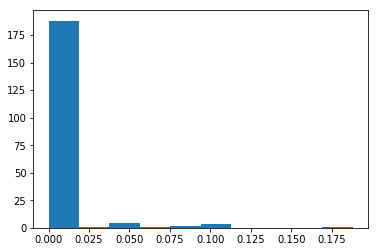

In [319]:
import matplotlib.pyplot as plt
%matplotlib inline
indices = hist_and_support(pca.weights, num_weights)

In [320]:
# pca1 = dill.load(open(filename, 'rb'))
# subweights = pca.weights[indices]
# pca1.controlset = [pca1.controlset[i] for i in indices]
# pca1.probs = list(np.array(subweights.T/sum(subweights)).T)
# oned_off_diagonals(pca1, scale)


SUPPORT:0.99994677832935
NUM CONTROLS: 25


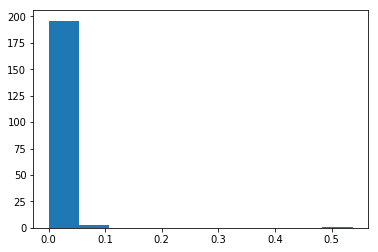

In [321]:
import matplotlib.pyplot as plt
num_weights0 = num_weights
%matplotlib inline
indices = hist_and_support(pca.weights_0, num_weights0)

In [324]:
# import matplotlib.pyplot as plt

# pca0 = dill.load(open(filename, 'rb'))
# indices = hist_and_support(pca.weights_0, num_weights0)
# subweights = pca.weights_0[indices]
# pca0.controlset = [pca0.controlset[i] for i in indices]
# pca0.probs = list(np.array(subweights.T/sum(subweights)).T)
# oned_off_diagonals(pca0, scale)


DOING COMBO [0, 0, -0.1, -0.1, 0, 0, 0]
DOING COMBO [0, 0, -0.03333333333333334, -0.03333333333333334, 0, 0, 0]
DOING COMBO [0, 0, -0.06666666666666668, -0.06666666666666668, 0, 0, 0]
DOING COMBO [0, 0, 0.0, 0.0, 0, 0, 0]
DOING COMBO [0, 0, 0.06666666666666665, 0.06666666666666665, 0, 0, 0]
DOING COMBO [0, 0, 0.033333333333333326, 0.033333333333333326, 0, 0, 0]
DOING COMBO [0, 0, 0.1, 0.1, 0, 0, 0]
DOING COMBO [0, 0, -0.1, -0.1, 0, 0, 0]
DOING COMBO [0, 0, -0.06666666666666668, -0.06666666666666668, 0, 0, 0]
DOING COMBO [0, 0, -0.03333333333333334, -0.03333333333333334, 0, 0, 0]
DOING COMBO [0, 0, 0.0, 0.0, 0, 0, 0]
DOING COMBO [0, 0, 0.033333333333333326, 0.033333333333333326, 0, 0, 0]
DOING COMBO [0, 0, 0.06666666666666665, 0.06666666666666665, 0, 0, 0]
DOING COMBO [0, 0, 0.1, 0.1, 0, 0, 0]


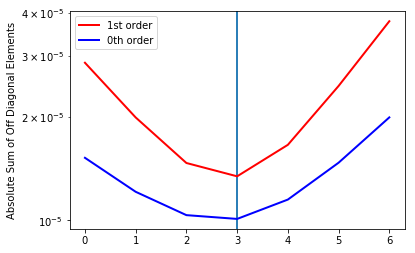

In [327]:
oned_off_diagonals2(pca1, pca0, scale/100, index=2)

In [74]:
off_diagonals2(pca1, pca0, scale*8)

DOING COMBO [-0.000125, -0.000125, -0.000125, -0.000125, -0.000125]
DOING COMBO [-0.000125, -6.25e-05, 0.0, 0.000125, -6.25e-05]
DOING COMBO [-0.000125, 6.25e-05, -0.000125, 6.25e-05, 0.0]
DOING COMBO [-0.000125, 0.000125, 6.25e-05, 0.0, 6.25e-05]
DOING COMBO [-0.000125, -6.25e-05, 0.0, 0.000125, 0.0]
DOING COMBO [-0.000125, 0.000125, 6.25e-05, 0.0, 0.000125]
DOING COMBO [-0.000125, 6.25e-05, -0.000125, 6.25e-05, 6.25e-05]
DOING COMBO [-0.000125, -0.000125, -0.000125, -0.000125, -6.25e-05]
DOING COMBO [-0.000125, -6.25e-05, 0.0, 0.000125, 6.25e-05]
DOING COMBO [-0.000125, 0.000125, 6.25e-05, 6.25e-05, -0.000125]
DOING COMBO [-0.000125, 6.25e-05, -0.000125, 6.25e-05, 0.000125]
DOING COMBO [-0.000125, -0.000125, -0.000125, -0.000125, 0.0]
DOING COMBO [-0.000125, -6.25e-05, 0.0, 0.000125, 0.000125]
DOING COMBO [-0.000125, 0.000125, 6.25e-05, 6.25e-05, -6.25e-05]
DOING COMBO [-0.000125, -0.000125, -0.000125, -0.000125, 6.25e-05]
DOING COMBO [-0.000125, 6.25e-05, -0.000125, 0.000125, -0.000

DOING COMBO [-0.000125, 6.25e-05, -6.25e-05, 0.000125, 0.000125]
DOING COMBO [-0.000125, -6.25e-05, 0.000125, -0.000125, 6.25e-05]
DOING COMBO [-0.000125, -0.000125, -6.25e-05, -6.25e-05, 0.0]
DOING COMBO [-0.000125, 0.000125, 0.000125, 0.000125, -6.25e-05]
DOING COMBO [-0.000125, 6.25e-05, 0.0, -0.000125, -0.000125]
DOING COMBO [-0.000125, -6.25e-05, 0.000125, -0.000125, 0.000125]
DOING COMBO [-0.000125, -0.000125, -6.25e-05, -6.25e-05, 6.25e-05]
DOING COMBO [-0.000125, 0.000125, 0.000125, 0.000125, 0.0]
DOING COMBO [-0.000125, 6.25e-05, 0.0, -0.000125, -6.25e-05]
DOING COMBO [-0.000125, -6.25e-05, 0.000125, -6.25e-05, -0.000125]
DOING COMBO [-0.000125, -0.000125, -6.25e-05, -6.25e-05, 0.000125]
DOING COMBO [-0.000125, 0.000125, 0.000125, 0.000125, 6.25e-05]
DOING COMBO [-0.000125, -6.25e-05, 0.000125, -6.25e-05, -6.25e-05]
DOING COMBO [-0.000125, 6.25e-05, 0.0, -0.000125, 0.0]
DOING COMBO [-0.000125, -0.000125, -6.25e-05, 0.0, -0.000125]
DOING COMBO [-0.000125, 0.000125, 0.000125, 0.

DOING COMBO [-0.000125, -0.000125, 0.0, 6.25e-05, -0.000125]
DOING COMBO [-0.000125, 0.0, -0.000125, 0.0, -6.25e-05]
DOING COMBO [-6.25e-05, -0.000125, -6.25e-05, -0.000125, 0.000125]
DOING COMBO [-0.000125, 6.25e-05, 6.25e-05, -6.25e-05, 6.25e-05]
DOING COMBO [-0.000125, -0.000125, 0.0, 6.25e-05, -6.25e-05]
DOING COMBO [-0.000125, 0.0, -0.000125, 0.0, 0.0]
DOING COMBO [-6.25e-05, -0.000125, -6.25e-05, -6.25e-05, -0.000125]
DOING COMBO [-0.000125, -0.000125, 0.0, 6.25e-05, 0.0]
DOING COMBO [-0.000125, 6.25e-05, 6.25e-05, -6.25e-05, 0.000125]
DOING COMBO [-0.000125, 0.0, -0.000125, 0.0, 6.25e-05]
DOING COMBO [-6.25e-05, -0.000125, -6.25e-05, -6.25e-05, -6.25e-05]
DOING COMBO [-0.000125, -0.000125, 0.0, 6.25e-05, 6.25e-05]
DOING COMBO [-0.000125, 6.25e-05, 6.25e-05, 0.0, -0.000125]
DOING COMBO [-0.000125, 0.0, -0.000125, 0.0, 0.000125]
DOING COMBO [-0.000125, -0.000125, 0.0, 6.25e-05, 0.000125]
DOING COMBO [-6.25e-05, -0.000125, -6.25e-05, -6.25e-05, 0.0]
DOING COMBO [-0.000125, 6.25e-05

DOING COMBO [-0.000125, -0.000125, 6.25e-05, 0.000125, 0.000125]
DOING COMBO [-6.25e-05, -0.000125, 0.0, 0.0, 0.0]
DOING COMBO [-0.000125, 6.25e-05, 0.000125, 6.25e-05, -6.25e-05]
DOING COMBO [-0.000125, 0.0, -6.25e-05, 0.000125, -0.000125]
DOING COMBO [-0.000125, -0.000125, 0.000125, -0.000125, -0.000125]
DOING COMBO [-6.25e-05, -0.000125, 0.0, 0.0, 6.25e-05]
DOING COMBO [-0.000125, 6.25e-05, 0.000125, 6.25e-05, 0.0]
DOING COMBO [-0.000125, 0.0, -6.25e-05, 0.000125, -6.25e-05]
DOING COMBO [-0.000125, -0.000125, 0.000125, -0.000125, -6.25e-05]
DOING COMBO [-6.25e-05, -0.000125, 0.0, 0.0, 0.000125]
DOING COMBO [-0.000125, 6.25e-05, 0.000125, 6.25e-05, 6.25e-05]
DOING COMBO [-0.000125, 0.0, -6.25e-05, 0.000125, 0.0]
DOING COMBO [-0.000125, -0.000125, 0.000125, -0.000125, 0.0]
DOING COMBO [-6.25e-05, -0.000125, 0.0, 6.25e-05, -0.000125]
DOING COMBO [-0.000125, 6.25e-05, 0.000125, 6.25e-05, 0.000125]
DOING COMBO [-0.000125, 0.0, -6.25e-05, 0.000125, 6.25e-05]
DOING COMBO [-0.000125, -0.000

DOING COMBO [-6.25e-05, -0.000125, 6.25e-05, 0.000125, -6.25e-05]
DOING COMBO [-0.000125, -6.25e-05, -0.000125, -6.25e-05, 6.25e-05]
DOING COMBO [-0.000125, 0.0, 6.25e-05, -0.000125, 6.25e-05]
DOING COMBO [-0.000125, 0.000125, -6.25e-05, -0.000125, -0.000125]
DOING COMBO [-6.25e-05, -0.000125, 6.25e-05, 0.000125, 0.0]
DOING COMBO [-0.000125, -6.25e-05, -0.000125, -6.25e-05, 0.000125]
DOING COMBO [-0.000125, 0.000125, -6.25e-05, -0.000125, -6.25e-05]
DOING COMBO [-0.000125, 0.0, 6.25e-05, -0.000125, 0.000125]
DOING COMBO [-6.25e-05, -0.000125, 6.25e-05, 0.000125, 6.25e-05]
DOING COMBO [-0.000125, -6.25e-05, -0.000125, 0.0, -0.000125]
DOING COMBO [-0.000125, 0.000125, -6.25e-05, -0.000125, 0.0]
DOING COMBO [-0.000125, 0.0, 6.25e-05, -6.25e-05, -0.000125]
DOING COMBO [-6.25e-05, -0.000125, 6.25e-05, 0.000125, 0.000125]
DOING COMBO [-0.000125, -6.25e-05, -0.000125, 0.0, -6.25e-05]
DOING COMBO [-0.000125, 0.000125, -6.25e-05, -0.000125, 6.25e-05]
DOING COMBO [-0.000125, 0.0, 6.25e-05, -6.25

DOING COMBO [-0.000125, -6.25e-05, -6.25e-05, 6.25e-05, -6.25e-05]
DOING COMBO [-0.000125, 0.0, 0.000125, 0.0, -0.000125]
DOING COMBO [-6.25e-05, -6.25e-05, -0.000125, -6.25e-05, -0.000125]
DOING COMBO [-0.000125, 0.000125, 0.0, -6.25e-05, 6.25e-05]
DOING COMBO [-0.000125, -6.25e-05, -6.25e-05, 6.25e-05, 0.0]
DOING COMBO [-0.000125, 0.0, 0.000125, 0.0, -6.25e-05]
DOING COMBO [-6.25e-05, -6.25e-05, -0.000125, -6.25e-05, -6.25e-05]
DOING COMBO [-0.000125, 0.000125, 0.0, -6.25e-05, 0.000125]
DOING COMBO [-0.000125, -6.25e-05, -6.25e-05, 6.25e-05, 6.25e-05]
DOING COMBO [-0.000125, 0.0, 0.000125, 0.0, 0.0]
DOING COMBO [-6.25e-05, -6.25e-05, -0.000125, -6.25e-05, 0.0]
DOING COMBO [-0.000125, 0.000125, 0.0, 0.0, -0.000125]
DOING COMBO [-0.000125, -6.25e-05, -6.25e-05, 6.25e-05, 0.000125]
DOING COMBO [-6.25e-05, -6.25e-05, -0.000125, -6.25e-05, 6.25e-05]
DOING COMBO [-0.000125, 0.0, 0.000125, 0.0, 6.25e-05]
DOING COMBO [-0.000125, 0.000125, 0.0, 0.0, -6.25e-05]
DOING COMBO [-0.000125, -6.25e-0

DOING COMBO [-6.25e-05, 0.0, 0.000125, -6.25e-05, 6.25e-05]
DOING COMBO [0.0, -0.000125, 0.000125, 0.000125, 6.25e-05]
DOING COMBO [-6.25e-05, 0.000125, 0.0, -0.000125, 0.000125]
DOING COMBO [-6.25e-05, -6.25e-05, -6.25e-05, 6.25e-05, -0.000125]
DOING COMBO [-6.25e-05, 0.0, 0.000125, -6.25e-05, 0.000125]
DOING COMBO [0.0, -0.000125, 0.000125, 0.000125, 0.000125]
DOING COMBO [-6.25e-05, 0.000125, 0.0, -6.25e-05, -0.000125]
DOING COMBO [-6.25e-05, -6.25e-05, -6.25e-05, 6.25e-05, -6.25e-05]
DOING COMBO [-6.25e-05, 0.0, 0.000125, 0.0, -0.000125]
DOING COMBO [0.0, -6.25e-05, -0.000125, -0.000125, -0.000125]
DOING COMBO [-6.25e-05, 0.000125, 0.0, -6.25e-05, -6.25e-05]
DOING COMBO [-6.25e-05, -6.25e-05, -6.25e-05, 6.25e-05, 0.0]
DOING COMBO [-6.25e-05, 0.0, 0.000125, 0.0, -6.25e-05]
DOING COMBO [0.0, -6.25e-05, -0.000125, -0.000125, -6.25e-05]
DOING COMBO [-6.25e-05, 0.000125, 0.0, -6.25e-05, 0.0]
DOING COMBO [-6.25e-05, -6.25e-05, -6.25e-05, 6.25e-05, 6.25e-05]
DOING COMBO [-6.25e-05, 0.0, 0

DOING COMBO [-6.25e-05, -6.25e-05, 0.0, 0.000125, 0.000125]
DOING COMBO [-6.25e-05, 0.000125, 6.25e-05, 0.0, 6.25e-05]
DOING COMBO [0.0, -6.25e-05, -6.25e-05, -6.25e-05, 0.0]
DOING COMBO [-6.25e-05, 6.25e-05, -0.000125, 6.25e-05, 6.25e-05]
DOING COMBO [-6.25e-05, -6.25e-05, 6.25e-05, -0.000125, -0.000125]
DOING COMBO [-6.25e-05, 0.000125, 6.25e-05, 0.0, 0.000125]
DOING COMBO [0.0, -6.25e-05, -6.25e-05, -6.25e-05, 6.25e-05]
DOING COMBO [-6.25e-05, 6.25e-05, -0.000125, 6.25e-05, 0.000125]
DOING COMBO [-6.25e-05, -6.25e-05, 6.25e-05, -0.000125, -6.25e-05]
DOING COMBO [-6.25e-05, 0.000125, 6.25e-05, 6.25e-05, -0.000125]
DOING COMBO [0.0, -6.25e-05, -6.25e-05, -6.25e-05, 0.000125]
DOING COMBO [-6.25e-05, 6.25e-05, -0.000125, 0.000125, -0.000125]
DOING COMBO [-6.25e-05, -6.25e-05, 6.25e-05, -0.000125, 0.0]
DOING COMBO [-6.25e-05, 0.000125, 6.25e-05, 6.25e-05, -6.25e-05]
DOING COMBO [-6.25e-05, -6.25e-05, 6.25e-05, -0.000125, 6.25e-05]
DOING COMBO [0.0, -6.25e-05, -6.25e-05, 0.0, -0.000125]
D

DOING COMBO [-6.25e-05, 0.000125, 0.000125, 0.000125, -6.25e-05]
DOING COMBO [-6.25e-05, -6.25e-05, 0.000125, -6.25e-05, 6.25e-05]
DOING COMBO [0.0, -6.25e-05, 0.0, 6.25e-05, -0.000125]
DOING COMBO [-6.25e-05, 6.25e-05, 0.0, -0.000125, 0.0]
DOING COMBO [-6.25e-05, 0.000125, 0.000125, 0.000125, 0.0]
DOING COMBO [-6.25e-05, -6.25e-05, 0.000125, -6.25e-05, 0.000125]
DOING COMBO [-6.25e-05, 6.25e-05, 0.0, -0.000125, 6.25e-05]
DOING COMBO [0.0, -6.25e-05, 0.0, 6.25e-05, -6.25e-05]
DOING COMBO [-6.25e-05, 0.000125, 0.000125, 0.000125, 6.25e-05]
DOING COMBO [-6.25e-05, -6.25e-05, 0.000125, 0.0, -0.000125]
DOING COMBO [-6.25e-05, 6.25e-05, 0.0, -0.000125, 0.000125]
DOING COMBO [0.0, -6.25e-05, 0.0, 6.25e-05, 0.0]
DOING COMBO [-6.25e-05, 0.000125, 0.000125, 0.000125, 0.000125]
DOING COMBO [-6.25e-05, -6.25e-05, 0.000125, 0.0, -6.25e-05]
DOING COMBO [-6.25e-05, 6.25e-05, 0.0, -6.25e-05, -0.000125]
DOING COMBO [0.0, -6.25e-05, 0.0, 6.25e-05, 6.25e-05]
DOING COMBO [0.0, -0.000125, -0.000125, -0.00

DOING COMBO [-6.25e-05, 6.25e-05, 6.25e-05, 0.0, -6.25e-05]
DOING COMBO [0.0, -0.000125, -6.25e-05, -6.25e-05, -0.000125]
DOING COMBO [-6.25e-05, 0.0, -0.000125, 6.25e-05, 0.000125]
DOING COMBO [0.0, -6.25e-05, 0.000125, -0.000125, -0.000125]
DOING COMBO [-6.25e-05, 6.25e-05, 6.25e-05, 0.0, 0.0]
DOING COMBO [0.0, -0.000125, -6.25e-05, -6.25e-05, -6.25e-05]
DOING COMBO [-6.25e-05, 0.0, -0.000125, 0.000125, -0.000125]
DOING COMBO [0.0, -6.25e-05, 0.000125, -0.000125, -6.25e-05]
DOING COMBO [-6.25e-05, 6.25e-05, 6.25e-05, 0.0, 6.25e-05]
DOING COMBO [-6.25e-05, 0.0, -0.000125, 0.000125, -6.25e-05]
DOING COMBO [0.0, -0.000125, -6.25e-05, -6.25e-05, 0.0]
DOING COMBO [0.0, -6.25e-05, 0.000125, -0.000125, 0.0]
DOING COMBO [-6.25e-05, 6.25e-05, 6.25e-05, 0.0, 0.000125]
DOING COMBO [-6.25e-05, 0.0, -0.000125, 0.000125, 0.0]
DOING COMBO [0.0, -0.000125, -6.25e-05, -6.25e-05, 6.25e-05]
DOING COMBO [0.0, -6.25e-05, 0.000125, -0.000125, 6.25e-05]
DOING COMBO [-6.25e-05, 6.25e-05, 6.25e-05, 6.25e-05,

DOING COMBO [-6.25e-05, 6.25e-05, 0.000125, 0.000125, -6.25e-05]
DOING COMBO [0.0, 0.0, -0.000125, 0.0, -0.000125]
DOING COMBO [0.0, -0.000125, 0.0, 6.25e-05, -0.000125]
DOING COMBO [-6.25e-05, 0.0, 0.0, -6.25e-05, -0.000125]
DOING COMBO [-6.25e-05, 6.25e-05, 0.000125, 0.000125, 0.0]
DOING COMBO [0.0, 0.0, -0.000125, 0.0, -6.25e-05]
DOING COMBO [0.0, -0.000125, 0.0, 6.25e-05, -6.25e-05]
DOING COMBO [-6.25e-05, 0.0, 0.0, -6.25e-05, -6.25e-05]
DOING COMBO [0.0, 0.0, -0.000125, 0.0, 0.0]
DOING COMBO [-6.25e-05, 6.25e-05, 0.000125, 0.000125, 6.25e-05]
DOING COMBO [0.0, -0.000125, 0.0, 6.25e-05, 0.0]
DOING COMBO [-6.25e-05, 0.0, 0.0, -6.25e-05, 0.0]
DOING COMBO [0.0, 0.0, -0.000125, 0.0, 6.25e-05]
DOING COMBO [-6.25e-05, 6.25e-05, 0.000125, 0.000125, 0.000125]
DOING COMBO [0.0, -0.000125, 0.0, 6.25e-05, 6.25e-05]
DOING COMBO [-6.25e-05, 0.0, 0.0, -6.25e-05, 6.25e-05]
DOING COMBO [0.0, 0.0, -0.000125, 0.0, 0.000125]
DOING COMBO [-6.25e-05, 0.000125, -0.000125, -0.000125, -0.000125]
DOING COM

DOING COMBO [-6.25e-05, 0.000125, -6.25e-05, -6.25e-05, -6.25e-05]
DOING COMBO [-6.25e-05, 0.0, 6.25e-05, 6.25e-05, -6.25e-05]
DOING COMBO [0.0, 0.0, -6.25e-05, 0.000125, -6.25e-05]
DOING COMBO [0.0, -0.000125, 0.000125, -0.000125, 0.0]
DOING COMBO [-6.25e-05, 0.0, 6.25e-05, 6.25e-05, 0.0]
DOING COMBO [-6.25e-05, 0.000125, -6.25e-05, -6.25e-05, 0.0]
DOING COMBO [0.0, 0.0, -6.25e-05, 0.000125, 0.0]
DOING COMBO [0.0, -0.000125, 0.000125, -0.000125, 6.25e-05]
DOING COMBO [-6.25e-05, 0.0, 6.25e-05, 6.25e-05, 6.25e-05]
DOING COMBO [-6.25e-05, 0.000125, -6.25e-05, -6.25e-05, 6.25e-05]
DOING COMBO [0.0, 0.0, -6.25e-05, 0.000125, 6.25e-05]
DOING COMBO [0.0, -0.000125, 0.000125, -0.000125, 0.000125]
DOING COMBO [-6.25e-05, 0.0, 6.25e-05, 6.25e-05, 0.000125]
DOING COMBO [0.0, 0.0, -6.25e-05, 0.000125, 0.000125]
DOING COMBO [-6.25e-05, 0.000125, -6.25e-05, -6.25e-05, 0.000125]
DOING COMBO [0.0, -0.000125, 0.000125, -6.25e-05, -0.000125]
DOING COMBO [-6.25e-05, 0.0, 6.25e-05, 0.000125, -0.000125]


DOING COMBO [6.25e-05, 0.0, -6.25e-05, 0.000125, -0.000125]
DOING COMBO [0.0, 0.0, 6.25e-05, 6.25e-05, -6.25e-05]
DOING COMBO [6.25e-05, -0.000125, 0.000125, -0.000125, -6.25e-05]
DOING COMBO [0.0, 0.000125, -6.25e-05, -6.25e-05, -6.25e-05]
DOING COMBO [6.25e-05, 0.0, -6.25e-05, 0.000125, -6.25e-05]
DOING COMBO [0.0, 0.0, 6.25e-05, 6.25e-05, 0.0]
DOING COMBO [6.25e-05, -0.000125, 0.000125, -0.000125, 0.0]
DOING COMBO [0.0, 0.000125, -6.25e-05, -6.25e-05, 0.0]
DOING COMBO [6.25e-05, 0.0, -6.25e-05, 0.000125, 0.0]
DOING COMBO [0.0, 0.0, 6.25e-05, 6.25e-05, 6.25e-05]
DOING COMBO [6.25e-05, -0.000125, 0.000125, -0.000125, 6.25e-05]
DOING COMBO [0.0, 0.000125, -6.25e-05, -6.25e-05, 6.25e-05]
DOING COMBO [6.25e-05, 0.0, -6.25e-05, 0.000125, 6.25e-05]
DOING COMBO [0.0, 0.0, 6.25e-05, 6.25e-05, 0.000125]
DOING COMBO [6.25e-05, -0.000125, 0.000125, -0.000125, 0.000125]
DOING COMBO [0.0, 0.000125, -6.25e-05, -6.25e-05, 0.000125]
DOING COMBO [6.25e-05, 0.0, -6.25e-05, 0.000125, 0.000125]
DOING CO

DOING COMBO [6.25e-05, -6.25e-05, -0.000125, 0.0, 0.0]
DOING COMBO [0.0, 0.000125, 0.0, 6.25e-05, 0.0]
DOING COMBO [0.0, 6.25e-05, -0.000125, -0.000125, 0.000125]
DOING COMBO [6.25e-05, 0.0, 6.25e-05, -6.25e-05, 0.0]
DOING COMBO [6.25e-05, -6.25e-05, -0.000125, 0.0, 6.25e-05]
DOING COMBO [0.0, 0.000125, 0.0, 6.25e-05, 6.25e-05]
DOING COMBO [0.0, 6.25e-05, -0.000125, -6.25e-05, -0.000125]
DOING COMBO [6.25e-05, 0.0, 6.25e-05, -6.25e-05, 6.25e-05]
DOING COMBO [6.25e-05, -6.25e-05, -0.000125, 0.0, 0.000125]
DOING COMBO [0.0, 0.000125, 0.0, 6.25e-05, 0.000125]
DOING COMBO [0.0, 6.25e-05, -0.000125, -6.25e-05, -6.25e-05]
DOING COMBO [6.25e-05, 0.0, 6.25e-05, -6.25e-05, 0.000125]
DOING COMBO [6.25e-05, -6.25e-05, -0.000125, 6.25e-05, -0.000125]
DOING COMBO [0.0, 0.000125, 0.0, 0.000125, -0.000125]
DOING COMBO [0.0, 6.25e-05, -0.000125, -6.25e-05, 0.0]
DOING COMBO [6.25e-05, 0.0, 6.25e-05, 0.0, -0.000125]
DOING COMBO [6.25e-05, -6.25e-05, -0.000125, 6.25e-05, -6.25e-05]
DOING COMBO [0.0, 0.00

Process ForkPoolWorker-34:
Process ForkPoolWorker-36:
Traceback (most recent call last):
Process ForkPoolWorker-33:
Traceback (most recent call last):
  File "/home/anthony/.pyenv/versions/3.6.3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Process ForkPoolWorker-35:
  File "/home/anthony/.pyenv/versions/3.6.3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/anthony/.pyenv/versions/3.6.3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()


KeyboardInterrupt: 

  File "/home/anthony/.pyenv/versions/3.6.3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/anthony/.pyenv/versions/3.6.3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/anthony/.pyenv/versions/3.6.3/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/home/anthony/.pyenv/versions/3.6.3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/home/anthony/.pyenv/versions/3.6.3/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/home/anthony/.pyenv/versions/3.6.3/lib/python3.6/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "/home/anthony/repos/decorrelating_errors/code/pauli_channel_approximation.py", line 149, in compute_dpn_and_fid

DOING COMBO [6.25e-05, 6.25e-05, 0.000125, -0.000125, 0.0]
DOING COMBO [0.000125, -0.000125, -6.25e-05, 0.000125, 6.25e-05]
DOING COMBO [0.000125, -6.25e-05, 0.000125, 6.25e-05, 0.000125]
DOING COMBO [0.000125, 6.25e-05, 0.0, 6.25e-05, -0.000125]
DOING COMBO [0.000125, 6.25e-05, 0.0, 6.25e-05, -6.25e-05]
DOING COMBO [0.000125, -0.000125, -6.25e-05, 0.000125, 0.000125]
DOING COMBO [0.000125, -6.25e-05, 0.000125, 0.000125, -0.000125]
DOING COMBO [6.25e-05, 6.25e-05, 0.000125, -0.000125, 6.25e-05]
DOING COMBO [0.000125, 6.25e-05, 0.0, 6.25e-05, 0.0]
DOING COMBO [0.000125, -0.000125, 0.0, -0.000125, -0.000125]
DOING COMBO [0.000125, -6.25e-05, 0.000125, 0.000125, -6.25e-05]
DOING COMBO [6.25e-05, 6.25e-05, 0.000125, -0.000125, 0.000125]
DOING COMBO [0.000125, 6.25e-05, 0.0, 6.25e-05, 6.25e-05]
DOING COMBO [0.000125, -0.000125, 0.0, -0.000125, -6.25e-05]
DOING COMBO [0.000125, -6.25e-05, 0.000125, 0.000125, 0.0]
DOING COMBO [6.25e-05, 6.25e-05, 0.000125, -6.25e-05, -0.000125]
DOING COMBO [0

DOING COMBO [0.000125, 6.25e-05, 6.25e-05, 0.000125, 0.000125]
DOING COMBO [6.25e-05, 0.000125, -0.000125, 0.0, -6.25e-05]
DOING COMBO [0.000125, 0.0, -6.25e-05, -0.000125, 6.25e-05]
DOING COMBO [0.000125, -0.000125, 6.25e-05, -6.25e-05, 0.0]
DOING COMBO [0.000125, 6.25e-05, 0.000125, -0.000125, -0.000125]
DOING COMBO [6.25e-05, 0.000125, -0.000125, 0.0, 0.0]
DOING COMBO [0.000125, 0.0, -6.25e-05, -0.000125, 0.000125]
DOING COMBO [0.000125, -0.000125, 6.25e-05, -6.25e-05, 6.25e-05]
DOING COMBO [0.000125, 6.25e-05, 0.000125, -0.000125, -6.25e-05]
DOING COMBO [6.25e-05, 0.000125, -0.000125, 0.0, 6.25e-05]
DOING COMBO [0.000125, 0.0, -6.25e-05, -6.25e-05, -0.000125]
DOING COMBO [0.000125, -0.000125, 6.25e-05, -6.25e-05, 0.000125]
DOING COMBO [0.000125, 6.25e-05, 0.000125, -0.000125, 0.0]
DOING COMBO [6.25e-05, 0.000125, -0.000125, 0.0, 0.000125]
DOING COMBO [0.000125, 0.0, -6.25e-05, -6.25e-05, -6.25e-05]
DOING COMBO [0.000125, -0.000125, 6.25e-05, 0.0, -0.000125]
DOING COMBO [0.000125, 6

DOING COMBO [0.000125, 0.0, 0.0, 0.0, -6.25e-05]
DOING COMBO [0.000125, 0.000125, -0.000125, -6.25e-05, 6.25e-05]
DOING COMBO [0.000125, -0.000125, 0.000125, 6.25e-05, -6.25e-05]
DOING COMBO [6.25e-05, 0.000125, -6.25e-05, 0.000125, -0.000125]
DOING COMBO [0.000125, 0.0, 0.0, 0.0, 0.0]
DOING COMBO [0.000125, 0.000125, -0.000125, -6.25e-05, 0.000125]
DOING COMBO [0.000125, -0.000125, 0.000125, 6.25e-05, 0.0]
DOING COMBO [6.25e-05, 0.000125, -6.25e-05, 0.000125, -6.25e-05]
DOING COMBO [0.000125, 0.0, 0.0, 0.0, 6.25e-05]
DOING COMBO [0.000125, 0.000125, -0.000125, 0.0, -0.000125]
DOING COMBO [0.000125, -0.000125, 0.000125, 6.25e-05, 6.25e-05]
DOING COMBO [6.25e-05, 0.000125, -6.25e-05, 0.000125, 0.0]
DOING COMBO [0.000125, 0.0, 0.0, 0.0, 0.000125]
DOING COMBO [0.000125, 0.000125, -0.000125, 0.0, -6.25e-05]
DOING COMBO [0.000125, -0.000125, 0.000125, 6.25e-05, 0.000125]
DOING COMBO [6.25e-05, 0.000125, -6.25e-05, 0.000125, 6.25e-05]
DOING COMBO [0.000125, 0.0, 0.0, 6.25e-05, -0.000125]
DOI

DOING COMBO [0.000125, -6.25e-05, -6.25e-05, -0.000125, -0.000125]
DOING COMBO [6.25e-05, 0.000125, 6.25e-05, -0.000125, 0.000125]
DOING COMBO [0.000125, 0.000125, -6.25e-05, 6.25e-05, 6.25e-05]
DOING COMBO [0.000125, 0.0, 6.25e-05, 0.000125, -6.25e-05]
DOING COMBO [0.000125, -6.25e-05, -6.25e-05, -0.000125, -6.25e-05]
DOING COMBO [6.25e-05, 0.000125, 6.25e-05, -6.25e-05, -0.000125]
DOING COMBO [0.000125, 0.000125, -6.25e-05, 6.25e-05, 0.000125]
DOING COMBO [0.000125, 0.0, 6.25e-05, 0.000125, 0.0]
DOING COMBO [0.000125, -6.25e-05, -6.25e-05, -0.000125, 0.0]
DOING COMBO [6.25e-05, 0.000125, 6.25e-05, -6.25e-05, -6.25e-05]
DOING COMBO [0.000125, 0.000125, -6.25e-05, 0.000125, -0.000125]
DOING COMBO [0.000125, 0.0, 6.25e-05, 0.000125, 6.25e-05]
DOING COMBO [0.000125, -6.25e-05, -6.25e-05, -0.000125, 6.25e-05]
DOING COMBO [6.25e-05, 0.000125, 6.25e-05, -6.25e-05, 0.0]
DOING COMBO [0.000125, 0.0, 6.25e-05, 0.000125, 0.000125]
DOING COMBO [0.000125, 0.000125, -6.25e-05, 0.000125, -6.25e-05]


DOING COMBO [0.000125, 6.25e-05, -0.000125, -6.25e-05, -0.000125]
DOING COMBO [0.000125, 0.000125, 6.25e-05, -0.000125, -6.25e-05]
DOING COMBO [6.25e-05, 0.000125, 0.000125, 0.0, 0.000125]
DOING COMBO [0.000125, -6.25e-05, 0.0, 0.0, -0.000125]
DOING COMBO [0.000125, 6.25e-05, -0.000125, -6.25e-05, -6.25e-05]
DOING COMBO [0.000125, 0.000125, 6.25e-05, -0.000125, 0.0]
DOING COMBO [6.25e-05, 0.000125, 0.000125, 6.25e-05, -0.000125]
DOING COMBO [0.000125, -6.25e-05, 0.0, 0.0, -6.25e-05]
DOING COMBO [0.000125, 6.25e-05, -0.000125, -6.25e-05, 0.0]
DOING COMBO [0.000125, 0.000125, 6.25e-05, -0.000125, 6.25e-05]
DOING COMBO [6.25e-05, 0.000125, 0.000125, 6.25e-05, -6.25e-05]
DOING COMBO [0.000125, -6.25e-05, 0.0, 0.0, 0.0]
DOING COMBO [0.000125, 6.25e-05, -0.000125, -6.25e-05, 6.25e-05]
DOING COMBO [0.000125, 0.000125, 6.25e-05, -0.000125, 0.000125]
DOING COMBO [6.25e-05, 0.000125, 0.000125, 6.25e-05, 0.0]
DOING COMBO [0.000125, -6.25e-05, 0.0, 0.0, 6.25e-05]
DOING COMBO [0.000125, 6.25e-05, -

DOING COMBO [0.000125, 6.25e-05, -6.25e-05, 0.0, 0.000125]
DOING COMBO [0.000125, 0.000125, 0.000125, -6.25e-05, 0.000125]
DOING COMBO [0.000125, -6.25e-05, 6.25e-05, 6.25e-05, 6.25e-05]
DOING COMBO [0.000125, -0.000125, -0.000125, 0.000125, 0.0]
DOING COMBO [0.000125, 6.25e-05, -6.25e-05, 6.25e-05, -0.000125]
DOING COMBO [0.000125, 0.000125, 0.000125, 0.0, -0.000125]
DOING COMBO [0.000125, -6.25e-05, 6.25e-05, 6.25e-05, 0.000125]
DOING COMBO [0.000125, -0.000125, -0.000125, 0.000125, 6.25e-05]
DOING COMBO [0.000125, 6.25e-05, -6.25e-05, 6.25e-05, -6.25e-05]
DOING COMBO [0.000125, 0.000125, 0.000125, 0.0, -6.25e-05]
DOING COMBO [0.000125, -6.25e-05, 6.25e-05, 0.000125, -0.000125]
DOING COMBO [0.000125, -0.000125, -0.000125, 0.000125, 0.000125]
DOING COMBO [0.000125, 6.25e-05, -6.25e-05, 6.25e-05, 0.0]
DOING COMBO [0.000125, 0.000125, 0.000125, 0.0, 0.0]
DOING COMBO [0.000125, -6.25e-05, 6.25e-05, 0.000125, -6.25e-05]
DOING COMBO [0.000125, 6.25e-05, -6.25e-05, 6.25e-05, 6.25e-05]
DOING